In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import time

In [ ]:
dt = pd.read_csv("sudoku_dataset/sudoku.csv")
print(dt.shape)

In [ ]:
def create_dataframe(string):
    array = list(string)
    reshaped = np.reshape(array, (9,9))
    return pd.DataFrame(reshaped)

In [ ]:
puz = create_dataframe(dt["quizzes"][0])
sol = create_dataframe(dt["solutions"][0])
print("quiz")
display(puz)
print("solution")
display(sol)

In [5]:
from keras.utils import to_categorical

def preprocessing_data(data):
    array = [list(map(int,list(i))) for i in data]
    return to_categorical(array, num_classes=10)

In [60]:
epochs = 100
batch = 32
train_size = 200000
test_size = 10000

In [31]:
x_train = np.array(range(train_size))
y_train = np.array(range(train_size))

x_test = np.array(range(train_size, train_size+test_size))
y_test = np.array(range(train_size, train_size+test_size))
print(x_train.shape)
print(x_test.shape)

[     0      1      2 ..., 199997 199998 199999]
[200000 200001 200002 ..., 209997 209998 209999]


In [32]:
# x_train = preprocessing_data(dt["quizzes"][:train_size])
# y_train = preprocessing_data(dt["solutions"][:train_size])

# x_test = preprocessing_data(dt["quizzes"][train_size:train_size+test_size])
# y_test = preprocessing_data(dt["solutions"][train_size:train_size+test_size])

# print(y_train.shape)
# print(y_train)

In [33]:
from keras.utils import Sequence

class SudokuSequence(Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        return preprocessing_data(dt["quizzes"][batch_x]), preprocessing_data(dt["solutions"][batch_y])

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Reshape, Dropout, BatchNormalization, Activation

model = Sequential()
model.add(Flatten(input_shape=(81,10)))
model.add(Dense(810))
model.add(Activation('relu'))
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.3))
model.add(Dense(810))
model.add(Reshape((81,10)))
# model.add(BatchNormalization())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rsmprop',
              metrics=['accuracy'])

tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs/{}'.format(int(time.time())), histogram_freq=0, write_graph=True, write_images=True)

# history = model.fit(x_train, y_train, validation_split=0.125, epochs=epochs, batch_size=batch, callbacks=[tbCallBack])
history = model.fit_generator(
    generator=SudokuSequence(x_train, y_train, batch), 
    steps_per_epoch=len(x_train)//batch, 
    epochs=epochs, callbacks=[tbCallBack], 
    validation_data=SudokuSequence(x_test, y_test, batch), 
    validation_steps=len(x_test)//batch)

# score = model.evaluate(x_test, y_test, batch_size=batch)
# print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 810)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                51904     
_________________________________________________________________
activation_25 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 810)               52650     
_________________________________________________________________
reshape_17 (Reshape)         (None, 81, 10)            0         
_________________________________________________________________
activation_26 (Activation)   (None, 81, 10)            0         
Total params: 104,554
Trainable params: 104,554
Non-trainable params: 0
_________________________________________________________________
Epoc

Epoch 110/1000
1562/1562 [==============================] - 41s 26ms/step - loss: 2.0497 - acc: 0.2934 - val_loss: 2.0499 - val_acc: 0.2934
Epoch 111/1000
1562/1562 [==============================] - 39s 25ms/step - loss: 2.0474 - acc: 0.2943 - val_loss: 2.0477 - val_acc: 0.2942: 0s - loss: 2.0475 - acc
Epoch 112/1000
1562/1562 [==============================] - 38s 25ms/step - loss: 2.0450 - acc: 0.2953 - val_loss: 2.0454 - val_acc: 0.2951
Epoch 113/1000
1562/1562 [==============================] - 38s 24ms/step - loss: 2.0426 - acc: 0.2962 - val_loss: 2.0431 - val_acc: 0.2960
Epoch 114/1000
1562/1562 [==============================] - 38s 24ms/step - loss: 2.0402 - acc: 0.2971 - val_loss: 2.0406 - val_acc: 0.2969
Epoch 115/1000
1562/1562 [==============================] - 36s 23ms/step - loss: 2.0379 - acc: 0.2980 - val_loss: 2.0383 - val_acc: 0.2975
Epoch 116/1000
1562/1562 [==============================] - 36s 23ms/step - loss: 2.0355 - acc: 0.2989 - val_loss: 2.0359 - val_acc: 0.

1562/1562 [==============================] - 37s 24ms/step - loss: 1.8420 - acc: 0.3585 - val_loss: 1.8467 - val_acc: 0.3569
Epoch 227/1000
1562/1562 [==============================] - 37s 24ms/step - loss: 1.8408 - acc: 0.3590 - val_loss: 1.8457 - val_acc: 0.3572
Epoch 228/1000
1562/1562 [==============================] - 37s 24ms/step - loss: 1.8402 - acc: 0.3591 - val_loss: 1.8450 - val_acc: 0.3575
Epoch 229/1000
1562/1562 [==============================] - 37s 24ms/step - loss: 1.8390 - acc: 0.3596 - val_loss: 1.8438 - val_acc: 0.3578
Epoch 230/1000
1562/1562 [==============================] - 37s 24ms/step - loss: 1.8384 - acc: 0.3599 - val_loss: 1.8433 - val_acc: 0.3581
Epoch 231/1000
1562/1562 [==============================] - 37s 24ms/step - loss: 1.8372 - acc: 0.3602 - val_loss: 1.8423 - val_acc: 0.3584
Epoch 232/1000
1562/1562 [==============================] - 37s 24ms/step - loss: 1.8365 - acc: 0.3605 - val_loss: 1.8413 - val_acc: 0.3587
Epoch 233/1000
1562/1562 [=========

1562/1562 [==============================] - 36s 23ms/step - loss: 1.7762 - acc: 0.3834 - val_loss: 1.7834 - val_acc: 0.3811
Epoch 343/1000
1562/1562 [==============================] - 36s 23ms/step - loss: 1.7759 - acc: 0.3835 - val_loss: 1.7832 - val_acc: 0.3812
Epoch 344/1000
1562/1562 [==============================] - 36s 23ms/step - loss: 1.7755 - acc: 0.3837 - val_loss: 1.7829 - val_acc: 0.3813
Epoch 345/1000
1562/1562 [==============================] - 36s 23ms/step - loss: 1.7754 - acc: 0.3837 - val_loss: 1.7826 - val_acc: 0.3813
Epoch 346/1000
1562/1562 [==============================] - 36s 23ms/step - loss: 1.7749 - acc: 0.3839 - val_loss: 1.7824 - val_acc: 0.3816
Epoch 347/1000
1562/1562 [==============================] - 36s 23ms/step - loss: 1.7747 - acc: 0.3840 - val_loss: 1.7817 - val_acc: 0.3817
Epoch 348/1000
1562/1562 [==============================] - 36s 23ms/step - loss: 1.7740 - acc: 0.3843 - val_loss: 1.7816 - val_acc: 0.3818
Epoch 349/1000
1562/1562 [=========

1562/1562 [==============================] - 35s 23ms/step - loss: 1.7477 - acc: 0.3954 - val_loss: 1.7566 - val_acc: 0.3924
Epoch 459/1000
1562/1562 [==============================] - 37s 23ms/step - loss: 1.7477 - acc: 0.3954 - val_loss: 1.7566 - val_acc: 0.3923
Epoch 460/1000
1562/1562 [==============================] - 37s 24ms/step - loss: 1.7474 - acc: 0.3956 - val_loss: 1.7561 - val_acc: 0.3925
Epoch 461/1000
1562/1562 [==============================] - 37s 23ms/step - loss: 1.7476 - acc: 0.3954 - val_loss: 1.7559 - val_acc: 0.3924
Epoch 462/1000
1562/1562 [==============================] - 37s 24ms/step - loss: 1.7471 - acc: 0.3957 - val_loss: 1.7561 - val_acc: 0.3923
Epoch 463/1000
1562/1562 [==============================] - 37s 24ms/step - loss: 1.7471 - acc: 0.3957 - val_loss: 1.7560 - val_acc: 0.3925
Epoch 464/1000
1562/1562 [==============================] - 37s 24ms/step - loss: 1.7471 - acc: 0.3958 - val_loss: 1.7557 - val_acc: 0.3928
Epoch 465/1000
1562/1562 [=========

1562/1562 [==============================] - 37s 23ms/step - loss: 1.7359 - acc: 0.4010 - val_loss: 1.7456 - val_acc: 0.3969
Epoch 575/1000
1562/1562 [==============================] - 36s 23ms/step - loss: 1.7356 - acc: 0.4010 - val_loss: 1.7454 - val_acc: 0.3971
Epoch 576/1000
1562/1562 [==============================] - 37s 23ms/step - loss: 1.7359 - acc: 0.4011 - val_loss: 1.7452 - val_acc: 0.3972
Epoch 577/1000
1562/1562 [==============================] - 36s 23ms/step - loss: 1.7359 - acc: 0.4010 - val_loss: 1.7452 - val_acc: 0.3971
Epoch 578/1000
1562/1562 [==============================] - 37s 23ms/step - loss: 1.7354 - acc: 0.4011 - val_loss: 1.7452 - val_acc: 0.3971
Epoch 579/1000
1562/1562 [==============================] - 37s 23ms/step - loss: 1.7354 - acc: 0.4013 - val_loss: 1.7449 - val_acc: 0.3970
Epoch 580/1000
1562/1562 [==============================] - 37s 23ms/step - loss: 1.7357 - acc: 0.4010 - val_loss: 1.7450 - val_acc: 0.3973
Epoch 581/1000
1562/1562 [=========

In [9]:
model.save("model_1.h5")

In [ ]:
from keras.models import load_model

model = load_model("model_1.h5")

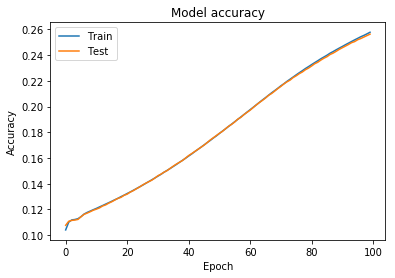

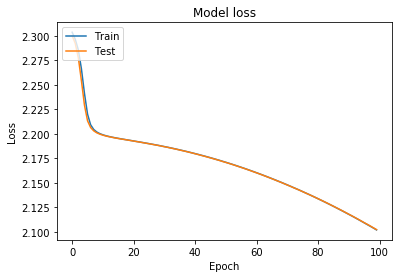

In [59]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [55]:
x = np.argmax(preprocessing_data(dt["quizzes"][x_test[0]]), axis=1)
y = np.argmax(preprocessing_data(dt["solutions"][y_test[0]]), axis=1)

p = model.predict(preprocessing_data(dt["quizzes"][x_test[0]]).reshape((1,81,10)))
p = p.reshape((81,10))
p = [np.argmax(i) for i in p]

puz = create_dataframe(x)
sol = create_dataframe(y)
pre = create_dataframe(p)

print("quiz")
display(puz)
print("solution")
display(sol)
print("predicted")
display(pre)

quiz


,0,1,2,3,4,5,6,7,8
0,7,0,1,0,2,8,3,9,0
1,2,3,0,0,0,4,8,0,0
2,0,0,9,0,0,0,0,0,4
3,9,0,0,0,3,2,1,7,0
4,0,0,8,0,9,0,5,4,0
5,1,0,6,0,0,7,0,0,8
6,4,6,0,0,0,9,7,0,0
7,0,1,0,0,6,0,0,0,0
8,0,0,7,5,0,0,0,0,3


solution


,0,1,2,3,4,5,6,7,8
0,7,4,1,6,2,8,3,9,5
1,2,3,5,9,1,4,8,6,7
2,6,8,9,3,7,5,2,1,4
3,9,5,4,8,3,2,1,7,6
4,3,7,8,1,9,6,5,4,2
5,1,2,6,4,5,7,9,3,8
6,4,6,3,2,8,9,7,5,1
7,5,1,2,7,6,3,4,8,9
8,8,9,7,5,4,1,6,2,3


predicted


,0,1,2,3,4,5,6,7,8
0,7,4,1,9,8,8,3,9,3
1,7,3,9,1,7,4,8,8,2
2,8,8,9,3,2,3,4,7,4
3,9,9,9,4,3,2,7,8,8
4,1,7,8,9,9,9,1,4,6
5,1,2,3,7,1,7,9,9,9
6,3,3,8,7,2,9,8,1,5
7,5,1,7,2,4,3,9,1,4
8,6,9,7,7,8,1,9,1,3
